# Problem set 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('custom.mplstyle')
%config InlineBackend.figure_format = 'retina'

OSError: 'custom.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

# Susceptible-Infected-Recovered (SIR) models
___

[SIR models](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics) describe the spread of a pathogen in a population. The SIR model breaks down the overall population into three subsets: 
* the susceptible population $S$, which consists of folks who haven't been infected yet and can be infected
* the infected population $I$, which can recover from the infection or infect the susceptible population
* the recovered population $R$, which assumedly can't be reinfected. Note that sometimes this group is referred to as "removed," which could also include death by infection.


![SIR](SIR.jpg)


The system of differential equations for this model is:

$$
\begin{align*}
\frac{dS(t)}{dt} &= -\beta S(t) I(t) \\
\frac{dI(t)}{dt} &= \beta S(t) I(t) - \nu I(t) \\
\frac{dR(t)}{dt} &= \nu I(t)
\end{align*}
$$

where $\beta > 0$ is the rate at which a susceptible person meeting an infected individual becomes infected. Note that such encounters occur at rate $S(t) I(t)$. $\nu > 0$ is the rate at which infectious people recover. Here, we are letting $S$, $I$, and $R$ be the **fractions of the population** which are susceptible, infectious, or recovered, respectively: $S(t) + I(t) + R(t) = 1$. Because of this relationship, we consider the equation for $dR(t)/dt$ to be superfluous, as at each time point $R(t) = 1- S(t) -I(t)$. Additionally, by modeling the fractions of the overall population, we don't need to worry about what the size of the total population, making our lives a bit easier. 

The ratio of $\beta$ and $\nu$ constitutes what is called $R_0$, the basic reproduction number:

$$
R_0 = \frac{\beta}{\nu}
$$

$R_0$ describes how many people an infectious person infects on average; you probably have heard about $R_0$ in the context of SARS-CoV-2 infections. 

### **Question 1** (3 points): What are the units of $\beta$, $\nu$, and $R_0$? 

1.   List item
2.   List item

Show your work.

**Answer for question 1:**

β is the average number of susceptible individuals infected by one infectious individual per contact per unit of time (the transmission rate). (infected number/s).

𝜈 is the average number of infected individuals recovered per unit of time (recovery rate).(recoverd number/s).

𝑅0 is a dimensionless number and not a rate, which would have units of time−1.

## $R_0$ of different pathogens

For a given pathogen, the exact value of $R_0$ can change by changing the encounter rate within a population. I.e., if we limit encounters, the basic reproduction number goes down. That is why lockdowns have been used to reduce infections.

Different pathogens can also have different intrinsic pathogenicity and transmissibilities. For example, the Omicron variant of SARS-CoV-2 is highly transmissable (i.e., a relatively large $R_0$). 

Estimating $R_0$ is not straightforward and can be sensitive to data sampling.  Here are some of the $R_0$ estimates for various pathogens:


* measles: $R_0\simeq 15$
* influenza 1918 pandemic: $R_0 \simeq 2-3$
* influenza H1N1 pandemic (2009 pandemic): $R_0 \simeq 1.5 $
* Ebola outbreak, West Africa (2014): $R_0 \simeq 1.5- 2.5$
* SARS-CoV-2 (original strain 2019-2020): $R_0 \simeq 1.8- 3.6$
* SARS-CoV-2 ($\Delta$ variant): $R_0 \simeq 6$
* SARS-CoV-2 (Omicron variant): $R_0 \simeq 9$

# Limiting cases of the SIR model:

Note that $dS(t)/dt$ and $dI(t)/dt$ are coupled in a nonlinear way due to the presence of $\beta S(t) I(t)$. Systems of differential equations coupled nonlinearly rarely have analytical solutions. We can play the game of looking at how the populations evolve in limiting cases which make the solution tractable.

### **Question 2** (5 points): Analytically solve for $I(t)$ at the beginning of an infectious spread by letting $S(t) = S_0$, i.e., $S(t)$ is constant.

**Answer for question 2:**

$$
\frac{dI(t)}{dt} = \beta S(t) I(t) - \nu I(t)
$$

if S(t) = $S_0$,
$$
\frac{dI(t)}{dt} = \beta S_0 I(t) - \nu I(t) = (\beta S_0 - \nu) I(t)
$$

So
$$
I(t) = exp((\beta S_0 - \nu)t)
$$

# Euler method and the SIR model

1.   List item
2.   List item



The solution from Questions 2 is accurate only in the limiting regime. Here, we'll solve the equations irrespective of any regime using numerical integration.
___

Copy and paste your code from tutorial 2.

In [2]:
def euler_sir(s0, i0, reprod_num, nu, T, dt):
    # Compute the times in [0, T] at which S(t)
    # and I(t) will be evaluated.
    times = np.arange(0, T + dt, dt)
    times = times[times <= T]
    
    # Save the length of times as num_steps.
    num_steps = len(times)
    
    # Initialize numpy arrays with zeros to store
    # the values of S(t) and I(t).
    s = np.zeros(shape=num_steps)
    i = np.zeros(shape=num_steps)
    
    """
    Set the zeroth entry of s to be s0.
    """
    s[0] = s0
    
    """
    Set the zeroth entry of i to be i0.
    """
    i[0] = i0
    
    """
    Compute beta using reprod_num and nu.
    """
    beta = reprod_num * nu
    
    for t in range(0, num_steps - 1):
        """
        Compute ds using the current values of s and i.
        Hint: ds = ds/dt * dt.
        """
        ds = -beta * s[t] * i[t] * dt
        
        """
        Set the t + 1 entry of s. It's good practice
        to reuse calculations. Your solution should
        utilize ds which has already been computed.
        """
        s[t + 1] = s[t] + ds
        
        """
        Set the t + 1 entry of i. It's good practice
        to reuse calculations. Your solution should
        utilize ds which has already been computed.
        """
        i[t + 1] = i[t] - ds - nu * i[t] * dt
        
    return times, s, i

### **Question 3** (3 points): Run your function and store the results in a list or numpy array for the following parameters:
- $I(0) = 10^{-6}$
- $S(0) = 1 - I(0)$
- $\nu = \frac{1}{7}$ (recovery after a week)
- a range of $R_0 \in [2, 3, 5, 10]$ (average number of infections per individual)
- $T = 100$ days
- $\Delta t = 0.01$

In [3]:
i0 = 10e-6
s0 = 1 - i0
reprod_num = 2
nu = 1/7
T = 100
dt = 0.01

times, s, t = euler_sir(s0, i0, reprod_num, nu, T, dt)
print(times)
print(s)
print(t)

[0.000e+00 1.000e-02 2.000e-02 ... 9.998e+01 9.999e+01 1.000e+02]
[0.99999    0.99998997 0.99998994 ... 0.25687597 0.25682924 0.25678256]
[1.00000000e-05 1.00142854e-05 1.00285913e-05 ... 6.36582745e-02
 6.36140549e-02 6.35698576e-02]


### **Question 4** (5 points): For each $R_0$, plot $S(t)$, $I(t)$, and $R(t)$ vs. time as solid lines. On the same plot, plot the analytical solution for the limiting case of $I(t)$ solved for in Question 2 as dashed lines. Display a legend with each line's label. Label the axes appropriately. Title each plot with its respective $R_0$. Set the y-axis limits to be -0.05 and 1.05. E.g., use `ax.set_ylim(-0.05, 1.05)` or `plt.ylim(-0.05, 1.05)`.

You can either use `plt.plot` and have each plot on a separate figure or make a grid of plots. If you make a grid, use `fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(12,3))` and loop over axes <span style="background-color: #FFFF00">(see tutorial 2 solution for an example)</span>. Depending on your method, use `plt.title('TITLE')` or `ax.set_title('TITLE')` to give the plot a title. (Change `'TITLE'` to the $R_0$ being plotted.) For example, your plots **don't have to** but they could look like

![euler_plot](euler_plot.png)

If you also want only one legend that is placed outside, use `plt.legend(loc='center right', bbox_to_anchor=(NUM, 0.5))` and change `NUM` until it looks nice. Try `NUM` in the range of $[1.3, 1.4, 1.5, 1.6]$. <span style="background-color: #FFFF00">Again, you don't have to have your legend be outside.</span>

<span style="background-color: #FFFF00">THE EXAMPLE ABOVE DOESN'T HAVE THE ANALYTICAL SOLUTION FOR $I(t)$ FROM QUESTION 2 PLOTTED, BUT YOURS SHOULD HAVE IT!</span>

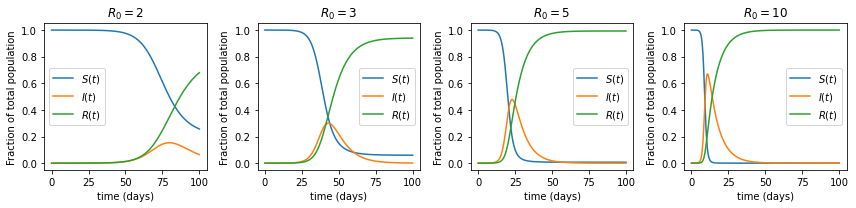

In [4]:
i0 = 10e-6
s0 = 1 - i0
reprod_nums = [2,3,5,10]
nu = 1/7
T = 100
dt = 0.01

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(12,3))

i = 0
for reprod_num in reprod_nums:
  times, s, t = euler_sir(s0, i0, reprod_num, nu, T, dt)
  axes[i].plot(times, s, label='$S(t)$')
  axes[i].plot(times, t, label='$I(t)$')
  axes[i].plot(times, 1 - s - t, label='$R(t)$')

  axes[i].set_xlabel('time (days)')
  axes[i].set_title('$R_0 = ' + str(reprod_num) + '$')
  axes[i].set_ylim(-0.05, 1.05)

  axes[i].set_ylabel('Fraction of total population')
  axes[i].legend()
  i = i+1
fig.tight_layout()
plt.show()



# How does $R_0$ determine $S(\infty)$, the fraction of individuals who remain susceptible at the end of an outbreak (i.e., were not infected during the outbreak)?
___


Let's first find the relation between $R_0$, $I(t)$ and $S(t)$. We compute $dI/dS$ to see how $R_0$ appears in our model naturally.

$$
\begin{align*}
\frac{dI(t)}{dS(t)} &=  \frac{dI(t)}{dt} \left( \frac{dS(t)}{dt} \right)^{-1} \\
&= \frac{\beta S(t) I(t) - \nu I(t)}{-\beta S(t) I(t)} \\
&= -1 + \frac{1}{R_0 S(t)}
\end{align*}
$$

This is a simple ordinary differential equation which we can solve using separation of variables.

$$
I(t) = -S(t) + \frac{\ln S(t)}{R_0} + C \quad \forall t
$$

where $C$ is some constant of integration found from the initial conditions.

### **Question 5:** (5 points)  Analytically determine $C$ based on $R_0$ and the initial conditions $I(0)$, $S(0)$. Show your work.

**Answer for question 5:**

$$
I(t) = -S(t) + \frac{\ln S(t)}{R_0} + C \quad \forall t
$$

$$
i_0 = -s_0 + \frac{\ln s_0}{R_0} + C
$$

$$
C = i_0 + s_0 - \frac{\ln s_0}{R_0}
$$

**$$i_0, s_0, R_0 \quad {are} \quad {given}$$**



### **Question 6:** (5 points) At large times (stationary state), the fraction of the infected population $I(t \to \infty)$ should go to zero. By using this assumption, show that $S(\infty) = \exp \left[R_0 (S(\infty) - C) \right]$ with your $C$ from Question 5.

**Answer for question 6:**

$$
I(t) = -S(t) + \frac{\ln S(t)}{R_0} + C \quad \forall t
$$

Since the fraction of the infected population  𝐼(𝑡→∞)  should go to zero, when $t \to \infty$, I(t) = 0.

So we can get

$$
0 = -S(\infty) + \frac{\ln S(\infty)}{R_0} + C
$$

$$
\frac{\ln S(\infty)}{R_0} = S(\infty) - C
$$

$$
\ln S(\infty) = {R_0}(S(\infty) - C)
$$

$$
S(\infty) = exp[{R_0}(S(\infty) - C)]
$$

where C is given from question 5

Essentially, this shows that we can determine the final state of an outbreak based on $R_0$ and the initial conditions.

### **Question 7:** (10 points) Write a function that outputs the fraction of the population which remains susceptible using your answer to question 6. If your answer to question 6 has a logarithm instead of an exponential in it, your function here will **not** work.

It should have as its parameters:
- `s0`, the intial fraction of that population that is susceptible
- `i0`, the initial fraction of the population that is infected
- `R0`, the reproduction number

It should return:
- `s`, the solution to the transcendental equation for $S(\infty)$

<span style="background-color: #FFFF00">To numerically solve for $S(\infty)$ you sould use the technique introduced for solving a *transcendental equation* in the lecture for tutorial 1.</span>

Hint: a reasonable initial value for this algorithm is $S(0)$.

In [5]:
import math
def stationary_s(s0, i0, reprod_num, maxiters=100, tol=1e-16):
    C = i0+s0-math.log(s0)/reprod_num
    print(C)
    S = 0 # Initial Guess 
    for i in range(maxiters):
      S_new = math.exp(reprod_num*(S-C)) - S
      if abs(S_new - S) < tol:
        break
      S = S_new
    # print('The root : %0.5f' % S_new) 
    # print('The number of iterations : %d' % i)
    return S

### **Question 8:** (2 points) Use your function from Question 7 to find $S(\infty)$ for different $R_0$ values, storing the output in a list or numpy array: 
- $I(0) = 10^{-6}$
- $S(0) = 0.2$ 
- A range of $R_0$ = `np.logspace(-1, 1, 200)`

In [6]:
i0 = math.pow(10, -6)
s0 = 0.2
R0 = np.logspace(-1, 1, 200)
res = []
for reprod_num in R0:
    tmp = stationary_s(s0, i0, reprod_num, 100, 1e-16)
    res.append(tmp)
    print(f'The res : {res}')

16.294380124341004
The res : [0.08559385968642874]
15.926207578537438
The res : [0.08559385968642874, 0.08618604075654357]
15.566457291364438
The res : [0.08559385968642874, 0.08618604075654357, 0.08676278041864291]
15.214936596526668
The res : [0.08559385968642874, 0.08618604075654357, 0.08676278041864291, 0.08732377206019964]
14.871457235133406
The res : [0.08559385968642874, 0.08618604075654357, 0.08676278041864291, 0.08732377206019964, 0.08786873466602696]
14.535835254875387
The res : [0.08559385968642874, 0.08618604075654357, 0.08676278041864291, 0.08732377206019964, 0.08786873466602696, 0.08839741388601821]
14.207890911508146
The res : [0.08559385968642874, 0.08618604075654357, 0.08676278041864291, 0.08732377206019964, 0.08786873466602696, 0.08839741388601821, 0.088909583020825]
13.88744857258896
The res : [0.08559385968642874, 0.08618604075654357, 0.08676278041864291, 0.08732377206019964, 0.08786873466602696, 0.08839741388601821, 0.088909583020825, 0.08940504391702764]
13.574336

### **Question 9:** (5 points) Plot $S(\infty)$ vs. $R_0$ on a logarithmic x-axis with a range of  $R_0$ = `np.logspace(-1, 1, 200)`.

Hint: [how to set the scale of the x-axis](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xscale.html#matplotlib.axes.Axes.set_xscale).

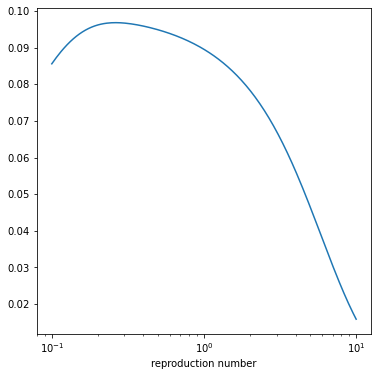

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,6))
ax.plot(R0, res)
ax.set_xscale("log")
ax.set_xlabel('reproduction number')
plt.show()

Herd immunity is the idea that a disease cannot grow into an epidemic when many people in a population are immune and not susceptible. The condition for herd immunity is obtained when 

$$
\frac{dI(0)}{dt} < 0
$$

Since

$$
\frac{dI(0)}{dt} = (\beta S(0) - \nu) I(0)
$$

we see that

$$
S(0) < 1/R_0
$$

is the condition for herd immunity.

### **Question 10:** (2 points) Discuss how does this herd immunity threshold impacts the value of $S(\infty)$ (the remaining number of susceptibles)?

Hint: Take your $S(\infty)$ vs. $R_0$ plot above and mark where $R_0 = 1 / S(0)$. [You could plot a vertical line](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html).

R0 = 1/S(0) = 1/0.2 = 5

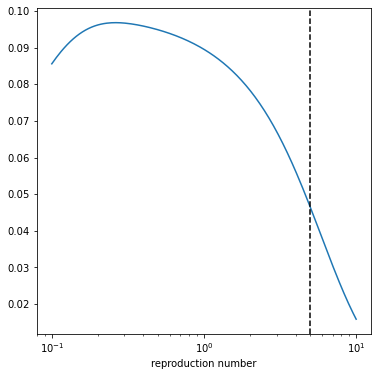

In [8]:
## calculate the R0. R0 = 1/S(0) = 1/0.2 = 5
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,6))
ax.plot(R0, res)
ax.set_xscale("log")
ax.set_xlabel('reproduction number')
ax.axvline(x=5, color="black", linestyle="--")
plt.show()

### **Bonus Question:** (20 points)     
* Compare and plot the features of outbreaks ($S(t),\, I(t), \, S(\infty)$) associated with the different pathogens listed at the beginning of this notebook. 
* How do the conditions for herd immunity compare among these pathogens?
* Why is estimating $R_0$ nontrivial?
* Why is the SIR model too simplistic in characterizing a pandemic? What factors are not taken into account? How can one improve upon this model?


1.00000066667
1.0000040000200001
1.0000066667000003
1.000005000025
1.0000037037222222
1.000001666675
1.0000011111166667


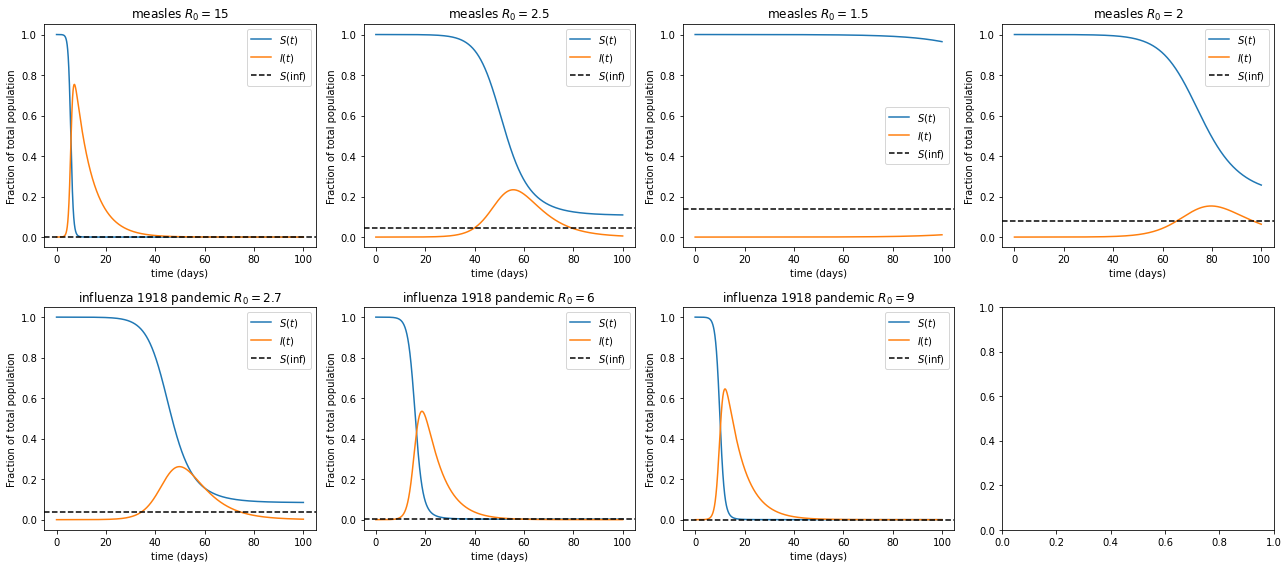

In [9]:
i0 = 10e-6
s0 = 1 - i0
reprod_nums = [15,2.5,1.5,2,2.7,6,9]
titles = ["measles","influenza 1918 pandemic","influenza H1N1 pandemic (2009 pandemic)","Ebola outbreak, West Africa (2014)","SARS-CoV-2 (original strain 2019-2020)","SARS-CoV-2 ($\Delta$ variant)","SARS-CoV-2 (Omicron variant)"]
nu = 1/7
T = 100
dt = 0.01

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(18,8))

i = 0
j = 0
for reprod_num in reprod_nums:
  times, s, t = euler_sir(s0, i0, reprod_num, nu, T, dt)
  s_inf = stationary_s(s0, i0, reprod_num, 100, 1e-16)
  if (i == 1) & (j == 3):
    break
  axes[i][j].plot(times, s, label='$S(t)$')
  axes[i][j].plot(times, t, label='$I(t)$')
  # axes[i][j].plot(times, 1 - s - t, label='$R(t)$')
  axes[i][j].axhline(y=s_inf, color="black", linestyle="--", label='$S(\inf)$')

  axes[i][j].set_xlabel('time (days)')
  axes[i][j].set_title(titles[i] + ' $R_0 =  ' + str(reprod_num) + '$')
  axes[i][j].set_ylim(-0.05, 1.05)

  axes[i][j].set_ylabel('Fraction of total population')
  axes[i][j].legend()
  j = j+1
  if j == 4:
    i = i+1
    j = 0
fig.tight_layout()
plt.show()



* How do the conditions for herd immunity compare among these pathogens?

Since the condition for herd immunity is 
$$
S(0) < 1/R_0
$$
the R0 is smaller, then herd immunity S(0) should be larger.


* Why is estimating $R_0$ nontrivial?

For $R_0$, the most important uses are determining if an emerging infectious disease can spread in a population and determining what proportion of the population should be immunized through vaccination to eradicate a disease. In commonly used infection models, when $R_0>1$ the infection will be able to start spreading in a population, but not if $R_0<1$. Generally, the larger the value of $R_0$, the harder it is to control the epidemic. So we could use the $R_0$ to understand the infectious disease, that's the reason why estimating $R_0$ nontrivial.


* Why is the SIR model too simplistic in characterizing a pandemic? What factors are not taken into account? How can one improve upon this model?

Since this model is just considering linear situation which is a simple model. We should consider the nonlinear incidence rate and recovery rate. Using nonlinear parameters to represent this model.